# Task_4 Spam Detection

## Loading Data

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("spam.csv",encoding="latin-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.shape

(5572, 5)

In [7]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Removing the Unecessery Columns

In [8]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [9]:
data.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

### We will Classify the Emails

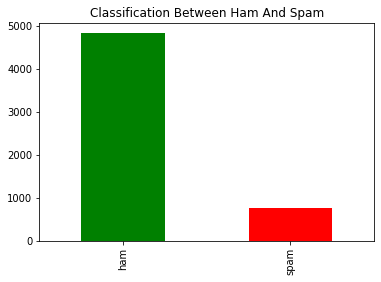

In [11]:
import matplotlib.pyplot as plt
df2=pd.value_counts(data["v1"])
df2.plot(kind="bar",color= ["green", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

In [12]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### We will first simplify the data 

In [13]:
for i in range(0,5572):
    if data['v1'][i]=='spam':
        data['v1'][i]=1
    else:
        data['v1'][i]=0

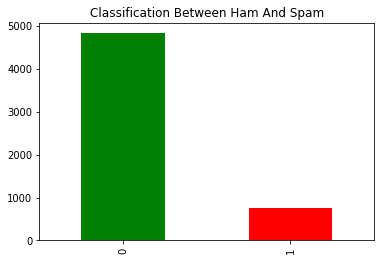

In [14]:
df2=pd.value_counts(data["v1"])
df2.plot(kind="bar",color= ["green", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

### Train-Test-Split

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data.v2, data.v1,test_size=0.3, random_state=42 )

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x_train_new= cv.fit_transform(x_train)

In [18]:
y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
2505    0
2525    0
4975    0
650     0
4463    0
Name: v1, Length: 1672, dtype: object

In [19]:
x_train

708     To review and KEEP the fantastic Nokia N-Gage ...
4338                   Just got outta class gonna go gym.
5029    Is there coming friday is leave for pongal?do ...
4921    Hi Dear Call me its urgnt. I don't know whats ...
2592    My friend just got here and says he's upping h...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 3900, dtype: object

In [20]:
y_train

708     1
4338    0
5029    0
4921    0
2592    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: v1, Length: 3900, dtype: object

In [21]:
y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
2505    0
2525    0
4975    0
650     0
4463    0
Name: v1, Length: 1672, dtype: object

In [22]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

### Converting the string data into integer

In [23]:
y_train=y_train.astype(int)

In [24]:
x_train_new=x_train_new.astype(int)

In [25]:
x_train_new

<3900x7206 sparse matrix of type '<class 'numpy.int32'>'
	with 51569 stored elements in Compressed Sparse Row format>

In [26]:
y_test=y_test.astype(int)

### Applying the LogisticRegression Model

In [27]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train_new, y_train)
lr_pred= lr.predict(cv.transform(x_test))
lr_cm= confusion_matrix(y_test, lr_pred)

In [28]:
f1_score(y_test, lr_pred)

0.9090909090909092